# Проверка гипотез по увеличению выручки в интернет-магазине - оценить результаты A/B теста.

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Описание данных

1. Данные для первой части

Файл /datasets/hypothesis.csv.

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

2. Данные для второй части

Файл /datasets/orders.csv. 

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Изучение данных из файла.

Импортируем библиотеки.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', 0)
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
except:
    data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


- Датасет состоит из 5 столбцов и 9 строк с гипотезами. Заменим названия столбцов к нижнему регистру.

In [4]:
try:
    orders = pd.read_csv('/datasets/orders.csv', sep=',')
except:
    orders = pd.read_csv('/datasets/orders.csv', sep=',')

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.tail()

,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


In [8]:
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [9]:
for row in orders: 
    print(orders[row].value_counts()) 

3574407166    1
2470658885    1
1476831880    1
3709669952    1
2764584088    1
             ..
1168756094    1
1185885568    1
11068804      1
486237576     1
1192185169    1
Name: transactionId, Length: 1197, dtype: int64
4256040402    11
2458001652    11
2378935119    9 
2038680547    8 
3717692402    5 
             .. 
3254689071    1 
4186744110    1 
1455861274    1 
3612778094    1 
3149228032    1 
Name: visitorId, Length: 1031, dtype: int64
2019-08-05    48
2019-08-14    47
2019-08-12    47
2019-08-15    46
2019-08-06    46
2019-08-28    45
2019-08-01    45
2019-08-27    44
2019-08-02    44
2019-08-19    43
2019-08-08    43
2019-08-29    42
2019-08-07    42
2019-08-09    41
2019-08-26    41
2019-08-22    41
2019-08-23    40
2019-08-03    40
2019-08-10    39
2019-08-16    38
2019-08-21    37
2019-08-13    35
2019-08-30    35
2019-08-04    33
2019-08-20    32
2019-08-31    32
2019-08-24    31
2019-08-18    26
2019-08-11    26
2019-08-25    24
2019-08-17    24
Name: date, dtype:

In [10]:
orders.duplicated().sum()

0

- Датасет состоит из 5 столбцов и 1197 строк. Пропущенных значений нет, полных дубликатов нет, нулей нет.Преобразовать в нужные типы данных.

In [11]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
except:
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
visitors.tail()

,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


In [15]:
visitors.isnull().sum()

date        0
group       0
visitors    0
dtype: int64

In [16]:
for row in visitors: 
    print(visitors[row].value_counts()) 

2019-08-11    2
2019-08-03    2
2019-08-09    2
2019-08-28    2
2019-08-08    2
2019-08-14    2
2019-08-10    2
2019-08-13    2
2019-08-12    2
2019-08-30    2
2019-08-16    2
2019-08-04    2
2019-08-05    2
2019-08-15    2
2019-08-07    2
2019-08-01    2
2019-08-25    2
2019-08-22    2
2019-08-21    2
2019-08-27    2
2019-08-20    2
2019-08-23    2
2019-08-24    2
2019-08-18    2
2019-08-31    2
2019-08-29    2
2019-08-06    2
2019-08-17    2
2019-08-02    2
2019-08-19    2
2019-08-26    2
Name: date, dtype: int64
A    31
B    31
Name: group, dtype: int64
610    2
718    2
654    2
490    2
509    1
575    1
699    1
709    1
361    1
560    1
679    1
421    1
676    1
546    1
544    1
543    1
722    1
707    1
668    1
667    1
406    1
531    1
656    1
655    1
395    1
650    1
646    1
644    1
770    1
577    1
711    1
581    1
617    1
378    1
413    1
746    1
502    1
628    1
756    1
369    1
412    1
621    1
748    1
619    1
487    1
507    1
609    1
737    1
735  

In [17]:
visitors.duplicated().sum()

0

- Датасет состоит из 3 столбцов и 62 строк. Пропущенных значений нет, полных дубликатов нет, нулей нет.Преобразовать в нужные типы данных.

- Предобработка данных.

In [18]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [19]:
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y.%m.%d')
orders['date'] = pd.to_datetime(orders['date'], format = '%Y.%m.%d')

In [20]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [22]:
display(orders.duplicated().sum())
visitors.duplicated().sum()

0

0

Размеры групп.

In [23]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [24]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Количество покупок в группе А=557,в группе В=640.

In [25]:
len(np.intersect1d(orders.query('group =="A"')['visitorId'].unique(),orders.query('group =="B"')['visitorId'].unique()))

58

In [26]:
len(orders['group'])

1197

4,8% пользователей,попавшие в обе группы.

# Часть 1. Приоритизация гипотез.
## Задачи.Приотизация.
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

$$ICE = \frac{Impact * Confidence}{Efforts}$$


In [27]:
data['ICE'] = (data['impact'] * data['confidence']) / data['efforts']

data[['hypothesis','ICE']].sort_values(by = 'ICE', ascending = False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE: 8,0,7 и 6.Наиболее не перспективные 4,3,5 и 1.

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [28]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']

data[['hypothesis' , 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE: 7,2,0 и 6.Наиболее не перспективные 4,5,1 и 3.

In [29]:
cm = sns.light_palette("red", as_cmap=True)

data_new = data[['hypothesis', 'ICE', 'RICE']].sort_values(by = 'RICE', ascending = False).\
                                             style.background_gradient(cmap=cm)
data_new

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3333,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33333,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,3


- Лучшие гипотезы для ICE-8,0,7,6; для RICE 7,2,0,6. Общие 0,7,6 в разных очередностях.Гипотеза 8 стала гораздо не перспективней,а ее место заняла гипотеза 2.Так получилось,потому что параметр reach для 8-1,а для 2-8.А гипотеза 7 стала первой из-за параметра-10.Важно количество пользователей, которых затронет гипотеза.

# Часть 2. Анализ A/B-теста

## Задачи.Тест.
 Проанализируйте A/B-тест:

- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

Создаем массив уникальных пар значений дат и групп теста.

In [30]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [31]:
datesGroups = orders[['date', 'group']].drop_duplicates()

datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Агрегируем значения.

In [32]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], \
                                                                     orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, \
      'revenue' : 'sum'}), axis=1).sort_values(by=['date', 'group'])

ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [33]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [34]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], \
                         visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), \
                         axis=1).sort_values(by=['date', 'group'])

visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим обе таблицы в одну с понятными названиями столбцов.

In [35]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования.

Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

In [36]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B

In [37]:
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

Строим график выручки групп

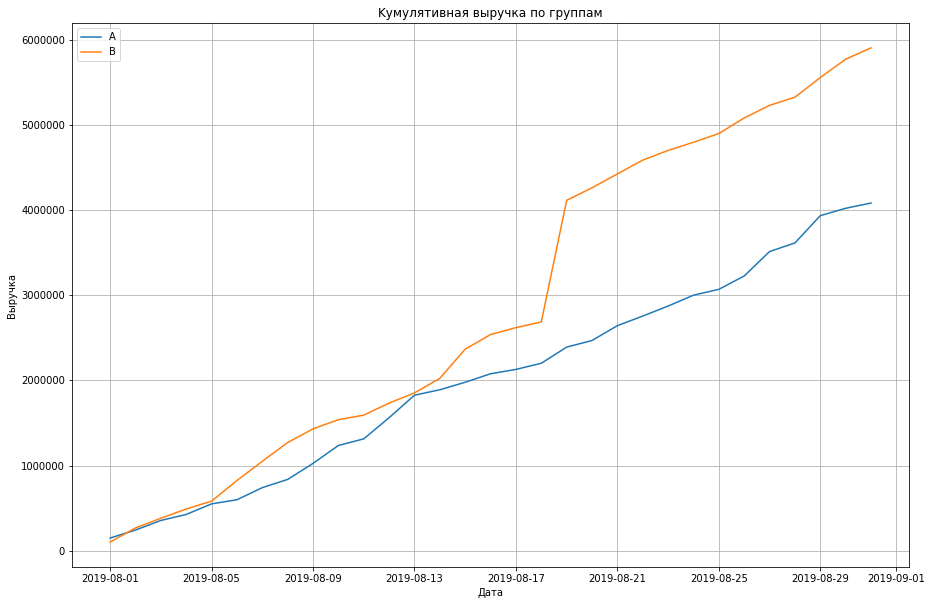

In [38]:
plt.figure(figsize=(15, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')
plt.legend()
plt.grid()
plt.title('Kумулятивная выручка по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.show()

Выручка почти равномерно увеличивается в течение всего теста.
Однако график выручки группы В в период 2019-08-18 и 2019-08-19 резко растет,в середине теста сегмент В вырвался вперед и продолжал лидировать весь остаток теста. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.При заключительном анализе их нужно удалить.

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

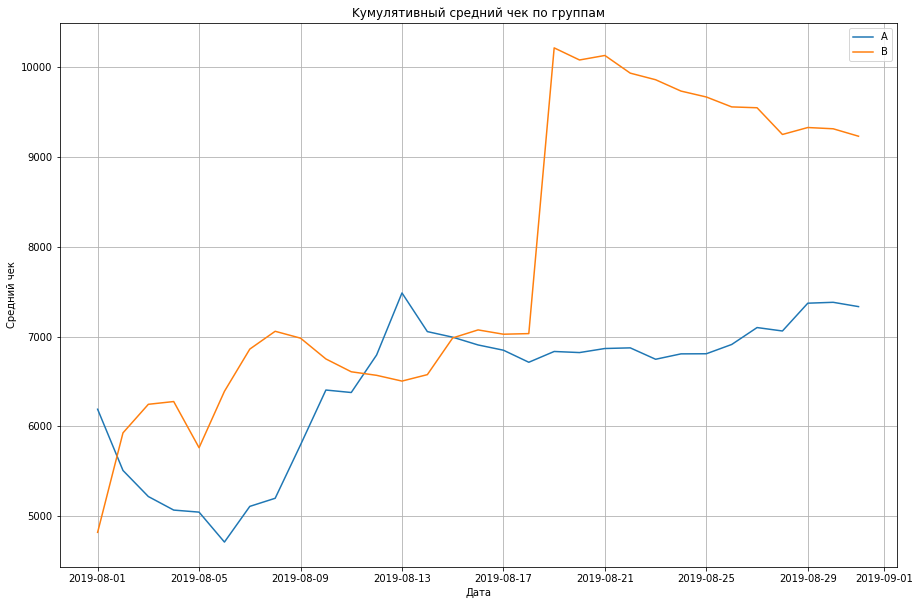

In [39]:
plt.figure(figsize=(15, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label = 'B')
plt.legend()
plt.grid()
plt.title('Kумулятивный средний чек по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.show()

Кумулятивное значение среднего чека по сегментам продолжает колебаться. В группе В в период 2019-08-18 и 2019-08-19 резкий рост,видимо крупный заказ.Принимать решения по этой метрике рано.И требуется дополнительный анализ выбросов,которые так сильно искажают результаты.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

Собираем данные в одном датафрейме.

In [40]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',\
                                                   right_on='date', how='left', suffixes=['A', 'B'])

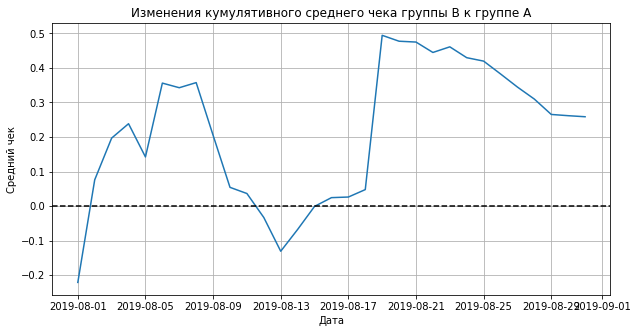

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'] / \
                                           mergedCumulativeRevenue['ordersB']) / \
                                          (mergedCumulativeRevenue['revenueA'] / \
                                           mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.title('Изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.show()

Результаты теста значительно и резко менялись в несколько дат.Видимо,именно тогда были совершены анамальные заказы.

### Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.

Считаем кумулятивную конверсию.

In [42]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeData['conversion'].head()

0    0.033380
1    0.029453
2    0.032885
3    0.034776
4    0.036856
Name: conversion, dtype: float64

Отделяем данные по группе A.

In [43]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataA.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
2,2019-08-02,A,44,38,242401,1338,0.032885
4,2019-08-03,A,68,62,354874,1845,0.036856
6,2019-08-04,A,84,77,425699,2562,0.032787
8,2019-08-05,A,109,100,549917,3318,0.032851


Отделяем данные по группе B.

In [44]:
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
cumulativeDataB.head()

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,101217,713,0.029453
3,2019-08-02,B,45,43,266748,1294,0.034776
5,2019-08-03,B,61,59,380996,1803,0.033833
7,2019-08-04,B,78,75,489567,2573,0.030315
9,2019-08-05,B,101,98,581995,3280,0.030793


Строим график и задаем масштаб осей.

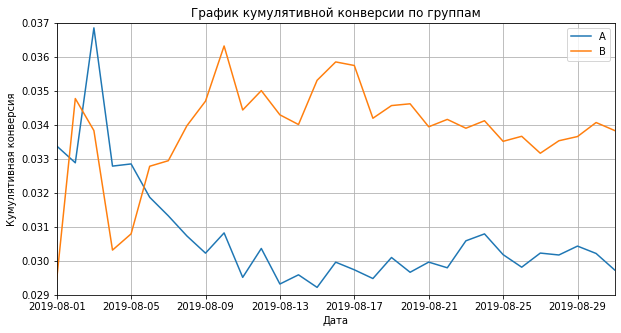

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B')
plt.legend()
plt.grid()
plt.title('График кумулятивной конверсии по группам')
plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.axis(["2019-08-01", '2019-08-31', 0.029, 0.037])
plt.show()

В начале теста сегмент А имел большую конверсию,но затем конверсия сегмента В стала стабильно выше конверсии сегмента A.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.

In [46]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],\
                              left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


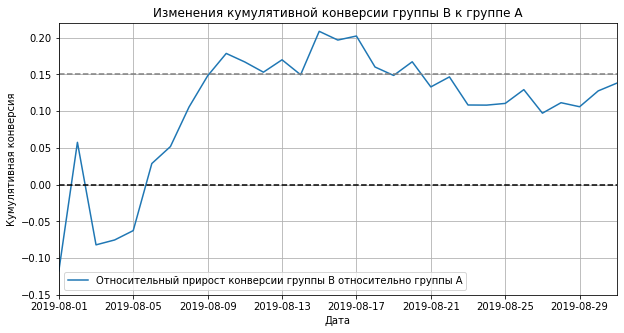

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB'] / \
         mergedCumulativeConversions['conversionA']-1,
label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.15, 0.22])
plt.grid()
plt.legend()
plt.title('Изменения кумулятивной конверсии группы B к группе A')
plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.show()

Почти с самого начала группа В лидирует по конверсии.Первые 10 дней видны скачки,на пятый день резкий рост,потом колеблится у прироста 15%-20%,на двадцатый день снижается и к концу теста начинает опять расти.

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [48]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg(
    {'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['userId','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head()

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Есть пользователи у которых 5 и больше заказов.

In [49]:
ordersByUsers.describe()

,userId,orders
count,1.031000e+03,1031.000000
mean,2.130713e+09,1.161009
std,1.228157e+09,0.724919
min,5.114589e+06,1.000000
25%,1.048013e+09,1.000000
50%,2.147999e+09,1.000000
75%,3.154897e+09,1.000000
max,4.283872e+09,11.000000


Среднее и медиана 1 заказ.

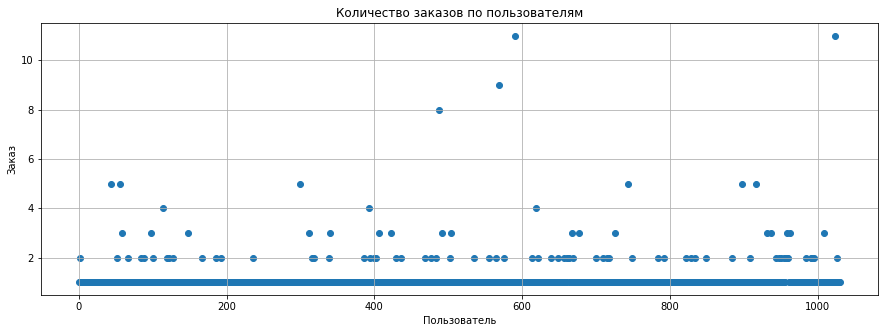

In [50]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15, 5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.grid()
plt.title('Количество заказов по пользователям')
plt.ylabel('Заказ')
plt.xlabel('Пользователь')
plt.show()

Есть немного больших заказов.В основном сделали 1 заказ. 

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [51]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершали более 2 заказов и не более 1% дороже 4 заказов.За анамальные заказы возьмем больше 2.

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

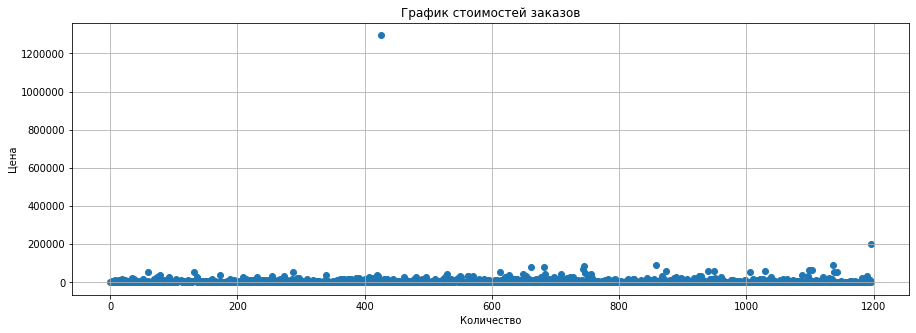

In [52]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15, 5))
plt.scatter(x_values, orders['revenue']) 
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Количество')
plt.ylabel('Цена')
plt.show()

Трудно сделать выводы.Рассмотрим поближе.

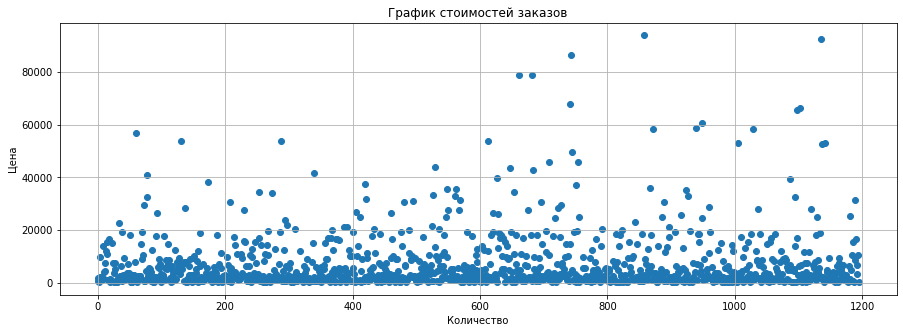

In [53]:
x_values = pd.Series(range(0,len(orders.query('revenue < 100000')['revenue'])))

plt.figure(figsize=(15, 5))
plt.scatter(x_values, orders.query('revenue < 100000')['revenue'])
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Количество')
plt.ylabel('Цена')
plt.show()

Есть немного дорогих заказов. По графику видно,что очень много заказов до 20000.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [54]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов между 28000 и 58233.2 рублей.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.

- Hуливая гипотеза - конверсии в группах А и В не различаются.
- Альтернотивная гипотеза - конверсии в группах А и В отличаются.
- Пороговое значение alpha (критический уровень статистической значимости) зададим 5%. Признаю 5%-ю вероятность слишком малой и на этом основании отвергаете нулевую гипотезу.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [55]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId' : pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [56]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [57]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative="two-sided")[1])

'0.01679'

p-value=0.01679,он значительно меньше 0.05, потому нулевую гипотезу отвергаем.Анализ "сырых" данных сообщает,что в конверсиимежду группами есть статистически значимые различия.

In [58]:
"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)

'0.138'

Относительный прирост=0.138.По "сырым" данным относительный прирост конверсии группы В к конверсии группы А равен 13%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

In [59]:
display('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], \
                                            orders[orders['group'] == 'B']['revenue'],alternative="two-sided")[1]))
'{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean()-1)

'0.729'

'0.259'

P-value=0.729,он значительно больше 0.05(72%). Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Относительное отличие=0.259.Средний чек группы B значительно выше(25%) среднего чека группы A.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.

Узнаем, сколько всего аномальных пользователей методом shape()

In [60]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], 
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']
    ],
    axis = 0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)
    .drop_duplicates()
    .sort_values()
)

display(abnormalUsers.head(5))
abnormalUsers.shape

1099    148427295
18      199603092
23      237748145
37      249864742
684     358944393
dtype: int64

(45,)

45 анамалий.

Проверим данные на нормальность распределения. Для этого используем критерий Шапиро-Уилка.

In [61]:
alpha = 0.05

results = st.shapiro(orders[orders['group']=='A']['revenue'])
p_value = results[
    1
]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение нормально') 

p-значение:  1.739703399801917e-34
Отвергаем нулевую гипотезу: распределение не нормально


In [62]:
alpha = 0.05

results = st.shapiro(orders[orders['group']=='B']['revenue'])
p_value = results[
    1
]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Подготовим выборки количества заказов по пользователям по группам теста.

In [63]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0, 
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0, 
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [64]:
display('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative="two-sided")[1]))
'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'0.00661'

'0.188'

P-value=0.00661,он получился еще ниже, чем по "сырым" данным(0,01679).Как и в случае с сырыми данными,статистическая значимость достигнута.Относительный прирост=0.188, сегмента B увеличился по сравнению с приростом по "сырым" данным(0,138).

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

In [65]:
'{0:.3f}'.format(
    stats.mannwhitneyu(
        orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'],
        orders[
            np.logical_and(
            orders['group'] == 'B',
            np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],alternative="two-sided"
        )[1]
)

'0.944'

P-value=0.944,он увеличился, по "сырым" данным(0,729),он гораздо больше 0.05.Значит мы не можем отвергнуть нулевую гипотезу,что различий в среднем чеке по "очищенным" данным нет.

In [66]:
"{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
)

'0.058'

Относительные различия=0.058, в среднем чеке между группами снизились с 25% до 5,8%. Аномалии очень сильно влияли на средний чек.

## Принимаем решение по результатам теста и объясняем его.  Остановить тест, зафиксировать победу группы В.

- Нет статистически значимое различие по конверсии между группами как по сырым данным(P-value=0,01679; 0,138), так и после фильтрации аномалий(P-value=0,00661; 0,188).
- Есть статистически значимого различия по среднему чеку между группами по "сырым"(P-value=0,729; 0,259) и по "очищенным" данным(P-value=0,944; 0,058).
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
- График различия среднего чека резко менялись в несколько дат. Видимо,именно тогда были совершены анамальные заказы.